<a href="https://www.kaggle.com/code/kondagurlesukitha/behaviour-context-recognition-system-assignment-3?scriptVersionId=125328707" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Behavioral context recognition system in a wild.

This Kaggle note used ExtraSensory Dataset and refinign the python code in the website http://extrasensory.ucsd.edu/ and showing different machine learning algorithms used to deal with system recognitions data.

In [593]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/kondagurlesukitha/extrasensory-dataset/9DC38D04-E82E-4F29-AB52-B476535226F2.features_labels.csv
/kaggle/input/d/kondagurlesukitha/extrasensory-dataset/E65577C1-8D5D-4F70-AF23-B3ADB9D3DBA3.features_labels.csv
/kaggle/input/d/kondagurlesukitha/extrasensory-dataset/C48CE857-A0DD-4DDB-BEA5-3A25449B2153.features_labels.csv
/kaggle/input/d/kondagurlesukitha/extrasensory-dataset/A76A5AF5-5A93-4CF2-A16E-62353BB70E8A.features_labels.csv
/kaggle/input/d/kondagurlesukitha/extrasensory-dataset/81536B0A-8DBF-4D8A-AC24-9543E2E4C8E0.features_labels.csv
/kaggle/input/d/kondagurlesukitha/extrasensory-dataset/CCAF77F0-FABB-4F2F-9E24-D56AD0C5A82F.features_labels.csv
/kaggle/input/d/kondagurlesukitha/extrasensory-dataset/83CF687B-7CEC-434B-9FE8-00C3D5799BE6.features_labels.csv
/kaggle/input/d/kondagurlesukitha/extrasensory-dataset/9759096F-1119-4E19-A0AD-6F16989C7E1C.features_labels.csv
/kaggle/input/d/kondagurlesukitha/extrasensory-dataset/4E98F91F-4654-42EF-B908-A3389443F2E7.features_lab

# Imports
Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline

In [594]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from io import StringIO;
import os;
import os.path;
import glob as glob
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import ClassifierChain
from sklearn import metrics

# EDA

    o   Defining features
    o   Defining context labels
    o   Identifying relationship between features and context labels
    o   Identifying relationship between labels
    o   Select the features to work with for target label
    o   Defining 1 target labels to work with.
    o   Cleaning missing labels and replacing NaN values with dataset samples

In [595]:
def get_sensor_names_from_features(feature_names):
    feat_sensor_names = np.array([None for feat in feature_names]);
    for (fi,feat) in enumerate(feature_names):
        if feat.startswith('raw_acc'):
            feat_sensor_names[fi] = 'Acc';
            pass;
        elif feat.startswith('proc_gyro'):
            feat_sensor_names[fi] = 'Gyro';
            pass;
        elif feat.startswith('raw_magnet'):
            feat_sensor_names[fi] = 'Magnet';
            pass;
        elif feat.startswith('watch_acceleration'):
            feat_sensor_names[fi] = 'WAcc';
            pass;
        elif feat.startswith('watch_heading'):
            feat_sensor_names[fi] = 'Compass';
            pass;
        elif feat.startswith('location'):
            feat_sensor_names[fi] = 'Loc';
            pass;
        elif feat.startswith('location_quick_features'):
            feat_sensor_names[fi] = 'Loc';
            pass;
        elif feat.startswith('audio_naive'):
            feat_sensor_names[fi] = 'Aud';
            pass;
        elif feat.startswith('audio_properties'):
            feat_sensor_names[fi] = 'AP';
            pass;
        elif feat.startswith('discrete'):
            feat_sensor_names[fi] = 'PS';
            pass;
        elif feat.startswith('lf_measurements'):
            feat_sensor_names[fi] = 'LF';
            pass;
        else:
            raise ValueError("!!! Unsupported feature name: %s" % feat);

        pass;

    return feat_sensor_names;  

'''
Read the data (precomputed sensor-features and labels) for a user.
This function assumes the user's data file is present.
'''
def validate_column_names_are_consistent(old_column_names,new_column_names):
    if len(old_column_names) != len(new_column_names):
        raise ValueError("!!! Inconsistent number of columns.");
        
    for ci in range(len(old_column_names)):
        if old_column_names[ci] != new_column_names[ci]:
            raise ValueError("!!! Inconsistent column %d) %s != %s" % (ci,old_column_names[ci],new_column_names[ci]));
        pass;
    return;
def get_label_pretty_name(label):
    if 'FIX_walking' in label:
        return 'Walking';
    if 'FIX_running' in label:
        return 'Running';
    if 'LOC_main_workplace' in label:
        return 'At main workplace' ;
    if 'OR_indoors' in label:
        return 'Indoors';
    if 'OR_outside' in label:
        return 'Outside';
    if 'LOC_home' in label:
        return 'At home';
    if 'FIX_restaurant' in label:
        return 'At a restaurant';
    if 'OR_exercise' in label:
        return 'Exercise';
    if  'LOC_beach' in label:
        return 'At the beach';
    if 'OR_standing' in label:
        return 'Standing';
    if 'WATCHING_TV' in label:
        return 'Watching TV'
    else:
        label.replace('label:', '')
    if label.endswith('_'):
        label = label[:-1] + ')';
        pass;
    
    label = label.replace('__',' (').replace('_',' ');
    label = label[0] + label[1:].lower();
    label = label.replace('i m','I\'m');
    return label;

def get_phone_label(label):
    if label == 'FIX_walking':
        return 'Walking';
    if label == 'FIX_running':
        return 'Running';
    if label == 'LOC_main_workplace':
        return 'At main workplace';
    if label == 'OR_indoors':
        return 'Indoors';
    if label == 'OR_outside':
        return 'Outside';
    if label == 'LOC_home':
        return 'At home';
    if label == 'FIX_restaurant':
        return 'At a restaurant';
    if label == 'OR_exercise':
        return 'Exercise';
    if label == 'LOC_beach':
        return 'At the beach';
    if label == 'OR_standing':
        return 'Standing';
    if label == 'WATCHING_TV':
        return 'Watching TV'
    
    if label.endswith('_'):
        label = label[:-1] + ')';
        pass;
    
    label = label.replace('__',' (').replace('_',' ');
    label = label[0] + label[1:].lower();
    label = label.replace('i m','I\'m');
    
    # if lable is phone related then return the label
    if "Phone" not in label: 
        return label
    else:
        return False


def get_sensor_names_from_features(feature_names):
    feat_sensor_names = np.array([None for feat in feature_names]);
    for (fi,feat) in enumerate(feature_names):
        if feat.startswith('raw_acc'):
            feat_sensor_names[fi] = 'Acc';
            pass;
        elif feat.startswith('proc_gyro'):
            feat_sensor_names[fi] = 'Gyro';
            pass;
        elif feat.startswith('raw_magnet'):
            feat_sensor_names[fi] = 'Magnet';
            pass;
        elif feat.startswith('watch_acceleration'):
            feat_sensor_names[fi] = 'WAcc';
            pass;
        elif feat.startswith('watch_heading'):
            feat_sensor_names[fi] = 'Compass';
            pass;
        elif feat.startswith('location'):
            feat_sensor_names[fi] = 'Loc';
            pass;
        elif feat.startswith('location_quick_features'):
            feat_sensor_names[fi] = 'Loc';
            pass;
        elif feat.startswith('audio_naive'):
            feat_sensor_names[fi] = 'Aud';
            pass;
        elif feat.startswith('audio_properties'):
            feat_sensor_names[fi] = 'AP';
            pass;
        elif feat.startswith('discrete'):
            feat_sensor_names[fi] = 'PS';
            pass;
        elif feat.startswith('lf_measurements'):
            feat_sensor_names[fi] = 'LF';
            pass;
        else:
            raise ValueError("!!! Unsupported feature name: %s" % feat);

        pass;

    return feat_sensor_names;  

def get_features_from_data(users_df):
    for (ci,col) in enumerate(users_df.columns):
        if col.startswith('label:'):
            first_label_ind = ci;
            break;
    pass;
    feature_names = users_df.columns[1:first_label_ind];
    return np.array(feature_names)

def project_features_to_selected_sensors(feature_names,sensors_to_use):

    feature_names_arr = []
    for sensor in sensors_to_use:
        if sensor == 'Acc':
            for feature in feature_names:
                #print (type(feature))
                if (feature.startswith('raw_acc')):
                    feature_names_arr.append(feature)
        elif sensor == 'WAcc':
            for feature in feature_names:
                if (feature.startswith('watch_acceleration')):
                    feature_names_arr.append(feature)
        elif sensor == 'Gyro':
            for feature in feature_names:
                if (feature.startswith('proc_gyro')):
                    feature_names_arr.append(feature)
        elif sensor == 'Magnet':
            for feature in feature_names:
                if (feature.startswith('raw_magnet')):
                    feature_names_arr.append(feature)
        elif sensor == 'Compass':
            for feature in feature_names:
                if (feature.startswith('watch_heading')):
                    feature_names_arr.append(feature)
        elif sensor == 'Loc':
            for feature in feature_names:
                if (feature.startswith('location')):
                    feature_names_arr.append(feature)
        elif sensor == 'Aud':
            for feature in feature_names:
                if (feature.startswith('audio_naive')):
                    feature_names_arr.append(feature)
        elif sensor == 'AP':
            for feature in feature_names:
                if (feature.startswith('audio_properties')):
                    feature_names_arr.append(feature)
        elif sensor == 'PS':
            for feature in feature_names:
                if (feature.startswith('discrete')):
                    feature_names_arr.append(feature)
        elif sensor == 'LF':
            for feature in feature_names:
                if (feature.startswith('lf_measurements')):
                    feature_names_arr.append(feature)
                    
    return feature_names_arr

def estimate_standardization_params(X):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        mean_vec = np.nanmean(X,axis=0);
        std_vec = np.nanstd(X,axis=0);
        return (mean_vec,std_vec);

def standardize_features(X,mean_vec,std_vec):
    # Subtract the mean, to centralize all features around zero:
    X_centralized = X - mean_vec.reshape((1,-1));
    # Divide by the standard deviation, to get unit-variance for all features:
    # * Avoid dividing by zero, in case some feature had estimate of zero variance
    normalizers = np.where(std_vec > 0., std_vec, 1.).reshape((1,-1));
    X_standard = X_centralized / normalizers;
    return X_standard;

def get_label_names(users_df):
    # Search for the column of the first label:
    for (ci,col) in enumerate(users_df.columns):
        if col.startswith('label:'):
            first_label_ind = ci;
            break;
        pass;

    label_names = np.array(users_df.columns[first_label_ind:-1]);
    for (li,label) in enumerate(label_names):
        # In the CSV the label names appear with prefix 'label:', but we don't need it after reading the data:
        assert label.startswith('label:');
        #label_names[li] = label.replace('label:','');
        pass;
    
    return (list(label_names));

def print_accuracy_repoprt(predictions, y_test):

    accuracy = np.mean(predictions == y_test);
    # Count occorrences of true-positive, true-negative, false-positive, and false-negative:
    tp = np.sum(np.logical_and(predictions,y_test));
    tn = np.sum(np.logical_and(np.logical_not(predictions),np.logical_not(y_test)));
    fp = np.sum(np.logical_and(predictions,np.logical_not(y_test)));
    fn = np.sum(np.logical_and(np.logical_not(predictions),y_test));

    # Sensitivity (=recall=true positive rate) and Specificity (=true negative rate):
    sensitivity = float(tp) / (tp+fn);
    specificity = float(tn) / (tn+fp);

    # Balanced accuracy is a more fair replacement for the naive accuracy:
    balanced_accuracy = (sensitivity + specificity) / 2.;

    # Precision:
    # Beware from this metric, since it may be too sensitive to rare labels.
    # In the ExtraSensory Dataset, there is large skew among the positive and negative classes,
    # and for each label the pos/neg ratio is different.
    # This can cause undesirable and misleading results when averaging precision across different labels.
    precision = float(tp) / (tp+fp);
    accuracy_list = [accuracy,sensitivity,specificity,balanced_accuracy,precision]
    print("-"*10);
    print('Accuracy*:         %.2f' % accuracy);
    print('Sensitivity (TPR): %.2f' % sensitivity);
    print('Specificity (TNR): %.2f' % specificity);
    print('Balanced accuracy: %.2f' % balanced_accuracy);
    print('Precision**:       %.2f' % precision);
    print("-"*10);
    #print('* The accuracy metric is misleading - it is dominated by the negative examples (typically there are many more negatives).')
    #print('** Precision is very sensitive to rare labels. It can cause misleading results when averaging precision over different labels.')
    return accuracy_list

In [596]:
def prepare_X_Y_for_ML(users_df):
    # prepare data for machine learning
    # 1. get all features available
    feature_names = get_features_from_data(users_df)

    # 2. get the features sensors feat from features
    feat_sensor_names = get_sensor_names_from_features(feature_names);
        
    # 3. select the sensors to use in the machine learning
    #sensors_to_use = ['Acc','WAcc'];

    # 4. get Data accoring to selected sensors with feaures;
    #feature_names_arr = []
    #feature_names_arr = project_features_to_selected_sensors(feature_names, sensors_to_use)
    X = users_df[feature_names]
    # 5. stanrdize the features substracting the mean value and dividing by standard deviation
    # so that all their values will be roughly in the same range:
    (mean_vec,std_vec) = estimate_standardization_params(X);
    X = standardize_features(X,mean_vec,std_vec);
    X[np.isnan(X)] = 0.
    # 6. X is ready for training
    # 7. Prepare Y target lables for training
    label_names = get_label_names(users_df)
    Y = users_df[label_names]
    # 8. clean nan values and converted to binary labels
    # Read the binary label values, and the 'missing label' indicators:
    trinary_labels_mat = users_df[label_names]; # This should have values of either 0., 1. or NaN
    M = np.isnan(trinary_labels_mat); # M is the missing label matrix
    Y = np.where(M,0,trinary_labels_mat) > 0.; # Y is the label matrix
    y_df = pd.DataFrame(Y)
    y_df.rename(columns=dict(enumerate(label_names, 0)), inplace = True)
    return (X,y_df,M,feature_names,label_names)

# GET the data
Try reading sample user in order to extract features and label names

In [597]:
%%time
#sample_user=pd.read_csv('/kaggle/input/the-extrasensory-dataset/user1.features_labels.csv')
#sample_user = pd.read_csv('61359772-D8D8-480D-B623-7C636EAD0C81.features_labels.csv')
sample_user = pd.read_csv('/kaggle/input/d/kondagurlesukitha/extrasensory-dataset/00EABED2-271D-49D8-B599-1D4A09240601.features_labels.csv')
#sample_user = pd.read_csv('1155FF54-63D3-4AB2-9863-8385D0BD0A13.features_labels.csv')

CPU times: user 92.3 ms, sys: 24.4 ms, total: 117 ms
Wall time: 115 ms


In [598]:
#Now let's check the features data columns before that has NAN values in certain columns "lf_measurements:temperature_ambient"
sample_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Columns: 278 entries, timestamp to label_source
dtypes: float64(274), int64(4)
memory usage: 4.9 MB


**Standardize sensor features measurements by substracting mean and deviding by SD and context lable to have only bolean variables**

In [599]:
# process the data to get features data and context label data
(X,Y,M,feature_names,label_names) = prepare_X_Y_for_ML(sample_user)
XY = pd.concat([X, Y], axis=1, sort=False)
XY.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:242: RuntimeWarning: invalid value encountered in greater


,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,...,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS
0,-0.176420,-0.249834,-0.253772,-0.258564,0.217749,-0.003670,-0.210261,-0.979071,0.176597,0.205436,...,False,False,False,False,False,False,False,True,True,False
1,-0.173318,-0.242249,-0.257470,-0.254349,0.212837,0.007680,-0.206184,-0.621726,0.176483,0.173897,...,False,False,False,False,False,False,False,True,True,False
2,-0.175787,-0.248206,-0.186669,-0.261760,0.209643,-0.019022,-0.207141,-0.437700,0.176597,0.186031,...,False,False,False,False,False,False,False,True,True,False
3,-0.172685,-0.249692,-0.214834,-0.261889,0.214694,0.002296,-0.207357,-0.756110,0.176597,0.168457,...,False,False,False,False,False,False,False,True,True,False
4,-0.141223,0.152685,0.273183,0.470627,0.224636,-0.001124,-0.214848,-3.442674,0.136529,0.143143,...,False,False,False,False,False,False,False,True,True,False


Displaying all columns in the dataset

In [600]:
print("Number of columns in the database =", sample_user.columns.size)
for column in sample_user.columns:
    print (column)

Number of columns in the database = 278
timestamp
raw_acc:magnitude_stats:mean
raw_acc:magnitude_stats:std
raw_acc:magnitude_stats:moment3
raw_acc:magnitude_stats:moment4
raw_acc:magnitude_stats:percentile25
raw_acc:magnitude_stats:percentile50
raw_acc:magnitude_stats:percentile75
raw_acc:magnitude_stats:value_entropy
raw_acc:magnitude_stats:time_entropy
raw_acc:magnitude_spectrum:log_energy_band0
raw_acc:magnitude_spectrum:log_energy_band1
raw_acc:magnitude_spectrum:log_energy_band2
raw_acc:magnitude_spectrum:log_energy_band3
raw_acc:magnitude_spectrum:log_energy_band4
raw_acc:magnitude_spectrum:spectral_entropy
raw_acc:magnitude_autocorrelation:period
raw_acc:magnitude_autocorrelation:normalized_ac
raw_acc:3d:mean_x
raw_acc:3d:mean_y
raw_acc:3d:mean_z
raw_acc:3d:std_x
raw_acc:3d:std_y
raw_acc:3d:std_z
raw_acc:3d:ro_xy
raw_acc:3d:ro_xz
raw_acc:3d:ro_yz
proc_gyro:magnitude_stats:mean
proc_gyro:magnitude_stats:std
proc_gyro:magnitude_stats:moment3
proc_gyro:magnitude_stats:moment4
proc_

Listing feature names available in the dataset.
features columns are all columns except the timestamp and context columns and they are 225 column

In [601]:
print ("Number of features columns in the dataset =",feature_names.size)
print (feature_names)

Number of features columns in the dataset = 225
['raw_acc:magnitude_stats:mean' 'raw_acc:magnitude_stats:std'
 'raw_acc:magnitude_stats:moment3' 'raw_acc:magnitude_stats:moment4'
 'raw_acc:magnitude_stats:percentile25'
 'raw_acc:magnitude_stats:percentile50'
 'raw_acc:magnitude_stats:percentile75'
 'raw_acc:magnitude_stats:value_entropy'
 'raw_acc:magnitude_stats:time_entropy'
 'raw_acc:magnitude_spectrum:log_energy_band0'
 'raw_acc:magnitude_spectrum:log_energy_band1'
 'raw_acc:magnitude_spectrum:log_energy_band2'
 'raw_acc:magnitude_spectrum:log_energy_band3'
 'raw_acc:magnitude_spectrum:log_energy_band4'
 'raw_acc:magnitude_spectrum:spectral_entropy'
 'raw_acc:magnitude_autocorrelation:period'
 'raw_acc:magnitude_autocorrelation:normalized_ac' 'raw_acc:3d:mean_x'
 'raw_acc:3d:mean_y' 'raw_acc:3d:mean_z' 'raw_acc:3d:std_x'
 'raw_acc:3d:std_y' 'raw_acc:3d:std_z' 'raw_acc:3d:ro_xy'
 'raw_acc:3d:ro_xz' 'raw_acc:3d:ro_yz' 'proc_gyro:magnitude_stats:mean'
 'proc_gyro:magnitude_stats:std' 

In [602]:
Y

,label:LYING_DOWN,label:SITTING,label:FIX_walking,label:FIX_running,label:BICYCLING,label:SLEEPING,label:LAB_WORK,label:IN_CLASS,label:IN_A_MEETING,label:LOC_main_workplace,...,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS
0,False,True,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,True,False
1,False,True,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,True,False
2,False,True,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,True,False
3,False,True,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,True,False
4,False,True,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2282,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2283,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2284,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2285,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [603]:

sample_user[feature_names].head()

,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,...,lf_measurements:screen_brightness,lf_measurements:temperature_ambient,discrete:time_of_day:between0and6,discrete:time_of_day:between3and9,discrete:time_of_day:between6and12,discrete:time_of_day:between9and15,discrete:time_of_day:between12and18,discrete:time_of_day:between15and21,discrete:time_of_day:between18and24,discrete:time_of_day:between21and3
0,0.996815,0.003529,-0.002786,0.006496,0.995203,0.996825,0.998502,1.748756,6.684605,5.043970,...,0.381436,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.996864,0.004172,-0.003110,0.007050,0.994957,0.996981,0.998766,1.935573,6.684603,5.043367,...,0.381436,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.996825,0.003667,0.003094,0.006076,0.994797,0.996614,0.998704,2.031780,6.684605,5.043599,...,0.381436,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.996874,0.003541,0.000626,0.006059,0.995050,0.996907,0.998690,1.865318,6.684605,5.043263,...,0.381436,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.997371,0.037653,0.043389,0.102332,0.995548,0.996860,0.998205,0.460806,6.683904,5.042779,...,0.381436,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [604]:
#sns.distplot(sample_user,x=sample_user.index,y='raw_acc:magnitude_stats:mean', color='red')

sensor features data after standrization process

In [605]:
# let's check the features data after standarization, it has been set to 0 instead of NaN
#sns.displot(data=X,x=X.index,y='raw_acc:magnitude_stats:mean')
X[feature_names].head()

,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,...,lf_measurements:screen_brightness,lf_measurements:temperature_ambient,discrete:time_of_day:between0and6,discrete:time_of_day:between3and9,discrete:time_of_day:between6and12,discrete:time_of_day:between9and15,discrete:time_of_day:between12and18,discrete:time_of_day:between15and21,discrete:time_of_day:between18and24,discrete:time_of_day:between21and3
0,-0.176420,-0.249834,-0.253772,-0.258564,0.217749,-0.003670,-0.210261,-0.979071,0.176597,0.205436,...,0.907288,0.0,-0.452016,-0.505869,-0.510637,2.090106,1.715548,-0.751908,-0.766219,-0.615932
1,-0.173318,-0.242249,-0.257470,-0.254349,0.212837,0.007680,-0.206184,-0.621726,0.176483,0.173897,...,0.907288,0.0,-0.452016,-0.505869,-0.510637,2.090106,1.715548,-0.751908,-0.766219,-0.615932
2,-0.175787,-0.248206,-0.186669,-0.261760,0.209643,-0.019022,-0.207141,-0.437700,0.176597,0.186031,...,0.907288,0.0,-0.452016,-0.505869,-0.510637,2.090106,1.715548,-0.751908,-0.766219,-0.615932
3,-0.172685,-0.249692,-0.214834,-0.261889,0.214694,0.002296,-0.207357,-0.756110,0.176597,0.168457,...,0.907288,0.0,-0.452016,-0.505869,-0.510637,2.090106,1.715548,-0.751908,-0.766219,-0.615932
4,-0.141223,0.152685,0.273183,0.470627,0.224636,-0.001124,-0.214848,-3.442674,0.136529,0.143143,...,0.907288,0.0,-0.452016,-0.505869,-0.510637,2.090106,1.715548,-0.751908,-0.766219,-0.615932


if we compare the histogram for the column "raw_acc:magnitude_stats:mean" it shows that standardization process worked fine and we have all values close to zero

# getting relations between context labels if any for that sample user

In [606]:
corr = Y[label_names].corr().sort_values(by=label_names, ascending=False)
corr

,label:LYING_DOWN,label:SITTING,label:FIX_walking,label:FIX_running,label:BICYCLING,label:SLEEPING,label:LAB_WORK,label:IN_CLASS,label:IN_A_MEETING,label:LOC_main_workplace,...,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS
label:LYING_DOWN,1.000000,-0.614386,-0.175876,NaN,NaN,0.808595,NaN,-0.203984,-0.249521,-0.194917,...,NaN,NaN,NaN,-0.192743,NaN,NaN,NaN,-0.004033,-0.261167,NaN
label:SLEEPING,0.808595,-0.496790,-0.142212,NaN,NaN,1.000000,NaN,-0.164940,-0.201762,-0.157609,...,NaN,NaN,NaN,-0.155851,NaN,NaN,NaN,0.282283,-0.211178,NaN
label:OR_indoors,0.471541,-0.096888,-0.310011,NaN,NaN,0.453720,NaN,0.283972,-0.444683,-0.347370,...,NaN,NaN,NaN,-0.007471,NaN,NaN,NaN,0.354869,-0.465438,NaN
label:LOC_home,0.349212,-0.227999,-0.239679,NaN,NaN,0.268038,NaN,-0.281960,-0.344904,-0.269426,...,NaN,NaN,NaN,0.054041,NaN,NaN,NaN,0.058538,-0.361002,NaN
label:WATCHING_TV,0.046600,-0.028630,-0.008196,NaN,NaN,-0.015188,NaN,-0.009506,-0.011628,-0.009083,...,NaN,NaN,NaN,-0.008982,NaN,NaN,NaN,-0.044869,-0.012170,NaN
label:PHONE_ON_TABLE,-0.004033,0.514324,-0.420140,NaN,NaN,0.282283,NaN,0.208584,0.259144,0.141393,...,NaN,NaN,NaN,-0.128418,NaN,NaN,NaN,1.000000,0.200927,NaN
label:BATHING_-_SHOWER,-0.051586,-0.078631,-0.022509,NaN,NaN,-0.041712,NaN,-0.026107,-0.031934,-0.024946,...,NaN,NaN,NaN,0.267640,NaN,NaN,NaN,0.053575,-0.033425,NaN
label:DRESSING,-0.054941,-0.083746,-0.023973,NaN,NaN,-0.044425,NaN,-0.027805,-0.034012,-0.026569,...,NaN,NaN,NaN,0.285050,NaN,NaN,NaN,-0.131247,-0.035599,NaN
label:SHOPPING,-0.058109,-0.088574,0.330399,NaN,NaN,-0.046987,NaN,-0.029408,-0.035973,-0.028101,...,NaN,NaN,NaN,-0.027787,NaN,NaN,NaN,-0.138814,-0.037652,NaN
label:CLEANING,-0.082525,-0.125791,-0.036009,NaN,NaN,-0.066729,NaN,-0.041764,-0.051088,-0.039908,...,NaN,NaN,NaN,0.428161,NaN,NaN,NaN,0.085708,-0.053472,NaN


we have 10 labels for this users that are missing data or have NaN values, so we will ignore them in our next step

# removing Nan from the view to focus on the interesting labels

In [607]:
corr.dropna(how='all')

,label:LYING_DOWN,label:SITTING,label:FIX_walking,label:FIX_running,label:BICYCLING,label:SLEEPING,label:LAB_WORK,label:IN_CLASS,label:IN_A_MEETING,label:LOC_main_workplace,...,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS
label:LYING_DOWN,1.000000,-0.614386,-0.175876,NaN,NaN,0.808595,NaN,-0.203984,-0.249521,-0.194917,...,NaN,NaN,NaN,-0.192743,NaN,NaN,NaN,-0.004033,-0.261167,NaN
label:SLEEPING,0.808595,-0.496790,-0.142212,NaN,NaN,1.000000,NaN,-0.164940,-0.201762,-0.157609,...,NaN,NaN,NaN,-0.155851,NaN,NaN,NaN,0.282283,-0.211178,NaN
label:OR_indoors,0.471541,-0.096888,-0.310011,NaN,NaN,0.453720,NaN,0.283972,-0.444683,-0.347370,...,NaN,NaN,NaN,-0.007471,NaN,NaN,NaN,0.354869,-0.465438,NaN
label:LOC_home,0.349212,-0.227999,-0.239679,NaN,NaN,0.268038,NaN,-0.281960,-0.344904,-0.269426,...,NaN,NaN,NaN,0.054041,NaN,NaN,NaN,0.058538,-0.361002,NaN
label:WATCHING_TV,0.046600,-0.028630,-0.008196,NaN,NaN,-0.015188,NaN,-0.009506,-0.011628,-0.009083,...,NaN,NaN,NaN,-0.008982,NaN,NaN,NaN,-0.044869,-0.012170,NaN
label:PHONE_ON_TABLE,-0.004033,0.514324,-0.420140,NaN,NaN,0.282283,NaN,0.208584,0.259144,0.141393,...,NaN,NaN,NaN,-0.128418,NaN,NaN,NaN,1.000000,0.200927,NaN
label:BATHING_-_SHOWER,-0.051586,-0.078631,-0.022509,NaN,NaN,-0.041712,NaN,-0.026107,-0.031934,-0.024946,...,NaN,NaN,NaN,0.267640,NaN,NaN,NaN,0.053575,-0.033425,NaN
label:DRESSING,-0.054941,-0.083746,-0.023973,NaN,NaN,-0.044425,NaN,-0.027805,-0.034012,-0.026569,...,NaN,NaN,NaN,0.285050,NaN,NaN,NaN,-0.131247,-0.035599,NaN
label:SHOPPING,-0.058109,-0.088574,0.330399,NaN,NaN,-0.046987,NaN,-0.029408,-0.035973,-0.028101,...,NaN,NaN,NaN,-0.027787,NaN,NaN,NaN,-0.138814,-0.037652,NaN
label:CLEANING,-0.082525,-0.125791,-0.036009,NaN,NaN,-0.066729,NaN,-0.041764,-0.051088,-0.039908,...,NaN,NaN,NaN,0.428161,NaN,NaN,NaN,0.085708,-0.053472,NaN


# showing a heatmap for correlation between labels will list 41 label instead of 51 for this sample user

In [608]:
corr.dropna(how='all').style.background_gradient(cmap='coolwarm', axis=None)

,label:LYING_DOWN,label:SITTING,label:FIX_walking,label:FIX_running,label:BICYCLING,label:SLEEPING,label:LAB_WORK,label:IN_CLASS,label:IN_A_MEETING,label:LOC_main_workplace,label:OR_indoors,label:OR_outside,label:IN_A_CAR,label:ON_A_BUS,label:DRIVE_-_I_M_THE_DRIVER,label:DRIVE_-_I_M_A_PASSENGER,label:LOC_home,label:FIX_restaurant,label:PHONE_IN_POCKET,label:OR_exercise,label:COOKING,label:SHOPPING,label:STROLLING,label:DRINKING__ALCOHOL_,label:BATHING_-_SHOWER,label:CLEANING,label:DOING_LAUNDRY,label:WASHING_DISHES,label:WATCHING_TV,label:SURFING_THE_INTERNET,label:AT_A_PARTY,label:AT_A_BAR,label:LOC_beach,label:SINGING,label:TALKING,label:COMPUTER_WORK,label:EATING,label:TOILET,label:GROOMING,label:DRESSING,label:AT_THE_GYM,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS
label:LYING_DOWN,1.000000,-0.614386,-0.175876,nan,nan,0.808595,nan,-0.203984,-0.249521,-0.194917,0.471541,nan,nan,-0.093941,nan,nan,0.349212,nan,nan,nan,-0.099661,-0.058109,nan,nan,-0.051586,-0.082525,nan,nan,0.046600,nan,nan,nan,nan,nan,nan,-0.127753,-0.098728,nan,nan,-0.054941,nan,nan,nan,nan,-0.192743,nan,nan,nan,-0.004033,-0.261167,nan
label:SLEEPING,0.808595,-0.496790,-0.142212,nan,nan,1.000000,nan,-0.164940,-0.201762,-0.157609,0.453720,nan,nan,-0.075961,nan,nan,0.268038,nan,nan,nan,-0.080585,-0.046987,nan,nan,-0.041712,-0.066729,nan,nan,-0.015188,nan,nan,nan,nan,nan,nan,-0.103300,-0.079831,nan,nan,-0.044425,nan,nan,nan,nan,-0.155851,nan,nan,nan,0.282283,-0.211178,nan
label:OR_indoors,0.471541,-0.096888,-0.310011,nan,nan,0.453720,nan,0.283972,-0.444683,-0.347370,1.000000,nan,nan,-0.167417,nan,nan,0.640535,nan,nan,nan,0.127237,-0.103559,nan,nan,0.071814,0.114885,nan,nan,0.026148,nan,nan,nan,nan,nan,nan,-0.227674,-0.129520,nan,nan,-0.015843,nan,nan,nan,nan,-0.007471,nan,nan,nan,0.354869,-0.465438,nan
label:LOC_home,0.349212,-0.227999,-0.239679,nan,nan,0.268038,nan,-0.281960,-0.344904,-0.269426,0.640535,nan,nan,-0.129852,nan,nan,1.000000,nan,nan,nan,0.167363,-0.080322,nan,nan,0.037958,0.148121,nan,nan,0.033713,nan,nan,nan,nan,nan,nan,-0.176588,-0.089999,nan,nan,0.006200,nan,nan,nan,nan,0.054041,nan,nan,nan,0.058538,-0.361002,nan
label:WATCHING_TV,0.046600,-0.028630,-0.008196,nan,nan,-0.015188,nan,-0.009506,-0.011628,-0.009083,0.026148,nan,nan,-0.004378,nan,nan,0.033713,nan,nan,nan,-0.004644,-0.002708,nan,nan,-0.002404,-0.003846,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,-0.005953,-0.004601,nan,nan,-0.002560,nan,nan,nan,nan,-0.008982,nan,nan,nan,-0.044869,-0.012170,nan
label:PHONE_ON_TABLE,-0.004033,0.514324,-0.420140,nan,nan,0.282283,nan,0.208584,0.259144,0.141393,0.354869,nan,nan,-0.224412,nan,nan,0.058538,nan,nan,nan,-0.002075,-0.138814,nan,nan,0.053575,0.085708,nan,nan,-0.044869,nan,nan,nan,nan,nan,nan,0.132679,0.052405,nan,nan,-0.131247,nan,nan,nan,nan,-0.128418,nan,nan,nan,1.000000,0.200927,nan
label:BATHING_-_SHOWER,-0.051586,-0.078631,-0.022509,nan,nan,-0.041712,nan,-0.026107,-0.031934,-0.024946,0.071814,nan,nan,-0.012023,nan,nan,0.037958,nan,nan,nan,-0.012755,-0.007437,nan,nan,1.000000,-0.010562,nan,nan,-0.002404,nan,nan,nan,nan,nan,nan,-0.016350,-0.012636,nan,nan,-0.007032,nan,nan,nan,nan,0.267640,nan,nan,nan,0.053575,-0.033425,nan
label:DRESSING,-0.054941,-0.083746,-0.023973,nan,nan,-0.044425,nan,-0.027805,-0.034012,-0.026569,-0.015843,nan,nan,-0.012805,nan,nan,0.006200,nan,nan,nan,-0.013585,-0.007921,nan,nan,-0.007032,-0.011249,nan,nan,-0.002560,nan,nan,nan,nan,nan,nan,-0.017414,-0.013457,nan,nan,1.000000,nan,nan,nan,nan,0.285050,nan,nan,nan,-0.131247,-0.035599,nan
label:SHOPPING,-0.058109,-0.088574,0.330399,nan,nan,-0.046987,nan,-0.029408,-0.035973,-0.028101,-0.103559,nan,nan,-0.013543,nan,nan,-0.080322,nan,nan,nan,-0.014368,1.000000,nan,nan,-0.007437,-0.011897,nan,nan,-0.002708,nan,nan,nan,nan,nan,nan,-0.018418,-0.014233,nan,nan,-0.007921,nan,nan,nan,nan,-0.027787,nan,nan,nan,-0.138814,-0.037652,n

* As per the heatmap shown for this sample user, there is strong coorelation between certain labels for example Lying Down, comes always with sleeping , Running comes with excercise, indoor comes with location at home, Bathing Shower comes with singing. However there are certain labels that comes only with itself and there are no chance it happens with other label, like Resturant.
* But in order to get more correlation for the whole population and not only this sample user. we read the whole users dataset all at once of 60 users with 300K+

In [609]:
#
%%time
path = r'F:\ExtraSensory\extrasensory-dataset' # use your path
csv_files = glob.glob(path + "/*.csv")

fifty_users_files = []
ten_users_files = [] 
list_user_files = []
i = 1
for file in csv_files:
    user_data = pd.read_csv(file)
    list_user_files.append(user_data)
    if i <= 50:
        fifty_users_files.append(user_data)
    else:
        ten_users_files.append(user_data)
    i = i + 1

all_users_data = pd.concat(list_user_files, axis=0, ignore_index=True)
fifty_users_data = pd.concat(fifty_users_files, axis=0, ignore_index=True)
ten_users_data = pd.concat(ten_users_files, axis=0, ignore_index=True)

UsageError: Line magic function `%%time` not found.


In [610]:
%%time
(X_all,Y_all,M_all,feature_names,label_names) = prepare_X_Y_for_ML(all_users_data)

NameError: name 'all_users_data' is not defined

In [611]:
%%time
corr_all = Y_all[label_names].corr().sort_values(by=label_names, ascending=False)
corr_all

NameError: name 'Y_all' is not defined

# from the table above we can see that the missing labels in the sample users are filled and have relation with other labels, so we can plot at heatmap to visualise the whole dataset of all 60 users

In [612]:
#
%%time
corr_all.style.background_gradient(cmap='coolwarm', axis=None)

UsageError: Line magic function `%%time` not found.


1. There are still labeles that come togeather with reasonble propablity like sleepting and Lying down. Byceling comes with excercise and label:STAIRS_-_GOINGUP label:STAIRS-_GOING_DOWN. the rest of labels doesn't seems to always happens togeather, and this maybe due to user didn't report multiple context label
1. let's get the most lables reported among all users to consider them in our target labels for prediction in machine learining process
1. between label we need to check the correlation between sensors features and context labels in order to use them for the maching learning excercise

In [613]:
n_examples_per_label = np.sum(np.array(Y),axis=0)
labels_and_counts = zip(label_names,n_examples_per_label)
sorted_labels_and_counts = sorted(labels_and_counts,reverse=True,key=lambda pair:pair[1])
print ("number of examples for every context label:")
print ("-"*20)
i = 0
label_x_arr = []
label_y_arr = []
for (label,count) in sorted_labels_and_counts:
    i = i +1
    label_x_arr.append(label)
    label_y_arr.append(count)
    print (" %i : %s - %d minutes"  % (i,label,count))
    pass;

number of examples for every context label:
--------------------
 1 : label:PHONE_ON_TABLE - 1594 minutes
 2 : label:OR_indoors - 1284 minutes
 3 : label:SITTING - 1106 minutes
 4 : label:LOC_home - 995 minutes
 5 : label:LYING_DOWN - 657 minutes
 6 : label:SLEEPING - 477 minutes
 7 : label:WITH_CO-WORKERS - 331 minutes
 8 : label:IN_A_MEETING - 306 minutes
 9 : label:IN_CLASS - 214 minutes
 10 : label:LOC_main_workplace - 197 minutes
 11 : label:OR_standing - 193 minutes
 12 : label:FIX_walking - 163 minutes
 13 : label:COMPUTER_WORK - 89 minutes
 14 : label:COOKING - 55 minutes
 15 : label:EATING - 54 minutes
 16 : label:ON_A_BUS - 49 minutes
 17 : label:CLEANING - 38 minutes
 18 : label:SHOPPING - 19 minutes
 19 : label:DRESSING - 17 minutes
 20 : label:BATHING_-_SHOWER - 15 minutes
 21 : label:WATCHING_TV - 2 minutes
 22 : label:FIX_running - 0 minutes
 23 : label:BICYCLING - 0 minutes
 24 : label:LAB_WORK - 0 minutes
 25 : label:OR_outside - 0 minutes
 26 : label:IN_A_CAR - 0 minu

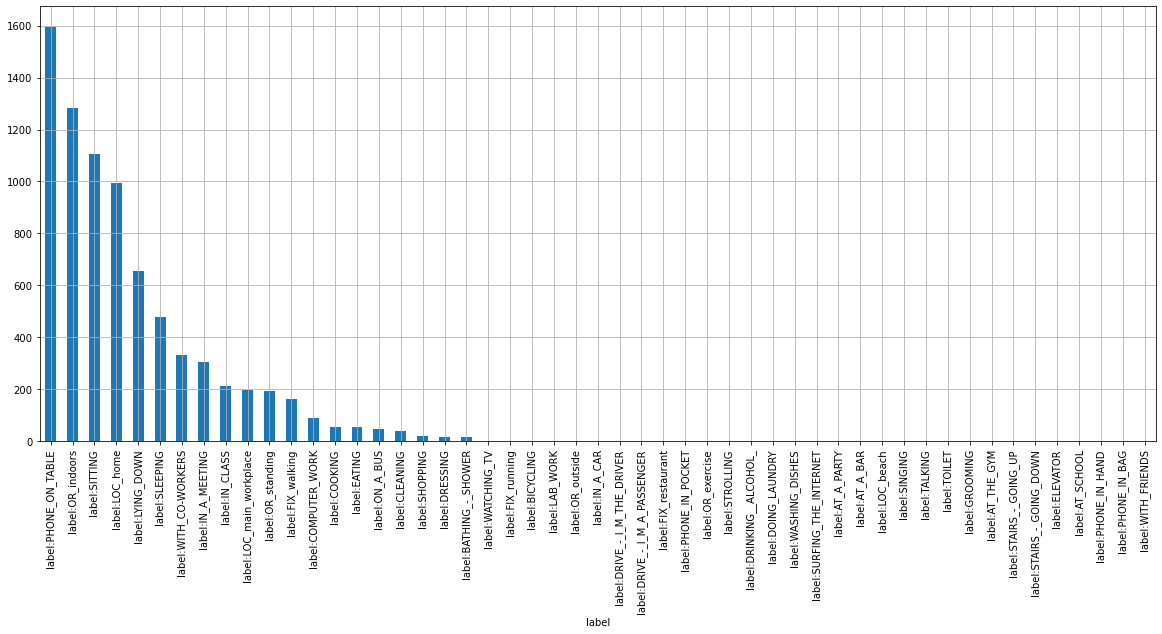

In [614]:
#X.isnull().values.any()
labels_df = pd.DataFrame(sorted_labels_and_counts)
labels_df.rename(columns = {0:'label'}, inplace = True) 
labels_df.rename(columns = {1:'count'}, inplace = True) 
labels_df.plot(x='label', y='count', kind='bar', legend=False, grid=True, figsize=(20, 8))

* selecting the top labels with many examples recorded in our dataset.
* Choosing Walking as target context label and the 14 top lable to be included in our Multiple label classifcation stage later on
* label:OR_indoors - 184692 minutes
* label:LOC_home - 152892 minutes
* label:SITTING - 136356 minutes
* label:PHONE_ON_TABLE - 115037 minutes
* label:LYING_DOWN - 104210 minutes
* label:SLEEPING - 83055 minutes
* label:AT_SCHOOL - 42331 minutes
* label:COMPUTER_WORK - 38081 minutes
* label:OR_standing - 37782 minutes
* label:TALKING - 36293 minutes
* label:LOC_main_workplace - 33944 minutes
* label:WITH_FRIENDS - 24737 minutes
* label:PHONE_IN_POCKET - 23401 minutes
* label:FIX_walking - 22136 minutes
* label:SURFING_THE_INTERNET - 19416 minutes
* listing the availble sensors for the dataset, we extract the name from column name
* 1. Acc stands for acceloremeter
* 2. Gyro stands for Gyroscope
* 3. Magnet stands for Magnetormeter
* 4. WAcc stands for Watch acceloremeter
* 5. Compass stands for Compass
* 6. Loc stands for Location
* 7. Aud stands for Audio
* 8. AP stands for Application
* 9. PS stands for Phone State
* 10. LFstands for LF

In [615]:
feat_sensor_names = get_sensor_names_from_features(feature_names)
print(pd.unique(feat_sensor_names))

['Acc' 'Gyro' 'Magnet' 'WAcc' 'Compass' 'Loc' 'Aud' 'AP' 'PS' 'LF']


1. Displaying a list of columns features related to certain features for acceloremeter (Acc) and Watch acceloremeter (WAcc) that can coorelate with Walking activity
1. checking the values of acceloremeters with the corresponding labels to see any coorelation between multiple lables and sensors in the same time

In [616]:
features_of_selected_sensors =  project_features_to_selected_sensors(feature_names,['Acc', 'WAcc'])
features_of_selected_sensors

['raw_acc:magnitude_stats:mean',
 'raw_acc:magnitude_stats:std',
 'raw_acc:magnitude_stats:moment3',
 'raw_acc:magnitude_stats:moment4',
 'raw_acc:magnitude_stats:percentile25',
 'raw_acc:magnitude_stats:percentile50',
 'raw_acc:magnitude_stats:percentile75',
 'raw_acc:magnitude_stats:value_entropy',
 'raw_acc:magnitude_stats:time_entropy',
 'raw_acc:magnitude_spectrum:log_energy_band0',
 'raw_acc:magnitude_spectrum:log_energy_band1',
 'raw_acc:magnitude_spectrum:log_energy_band2',
 'raw_acc:magnitude_spectrum:log_energy_band3',
 'raw_acc:magnitude_spectrum:log_energy_band4',
 'raw_acc:magnitude_spectrum:spectral_entropy',
 'raw_acc:magnitude_autocorrelation:period',
 'raw_acc:magnitude_autocorrelation:normalized_ac',
 'raw_acc:3d:mean_x',
 'raw_acc:3d:mean_y',
 'raw_acc:3d:mean_z',
 'raw_acc:3d:std_x',
 'raw_acc:3d:std_y',
 'raw_acc:3d:std_z',
 'raw_acc:3d:ro_xy',
 'raw_acc:3d:ro_xz',
 'raw_acc:3d:ro_yz',
 'watch_acceleration:magnitude_stats:mean',
 'watch_acceleration:magnitude_stats

Recurrent Neural Network (RNN) DeepLearning Part
here, we are using

Training the model usig Long Short-Term Memory (LSTM)

Here considered output label is : label:FIX_walking

In [617]:
X_train, X_test, y_train, y_test = train_test_split(X[features_of_selected_sensors], Y['label:FIX_walking'], test_size=0.30, random_state=42)

In [618]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Check the shape of X_train
print(X_train.shape)

import numpy as np


# check the number of dimensions in X_train
print(X_train.ndim)  # output: 2

# convert DataFrame to numpy array
X_train = X_train.values

# reshape X_train to have shape (batch_size, sequence_length, num_channels, 1)
# but since X_train has only 2 dimensions, we should modify the reshaping code accordingly
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
print(X_train.ndim)
# now check the shape of X_train again
 # output: (100, 10, 1)

print(X_train.shape)

# define LSTM architecture
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))

model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

import time
# Train model
start = time.time()
history=model.fit(X_train, y_train, epochs=10, batch_size=32)
end = time.time()
print('Training time:', end - start, 'seconds')



(1600, 72)
2
3
(1600, 72, 1)
Epoch 1/10
50/50 [==============================] - 1s 23ms/step - loss: 0.3563 - accuracy: 0.9081
Epoch 2/10
50/50 [==============================] - 1s 23ms/step - loss: 0.2139 - accuracy: 0.9275
Epoch 3/10
50/50 [==============================] - 1s 24ms/step - loss: 0.2129 - accuracy: 0.9275
Epoch 4/10
50/50 [==============================] - 1s 23ms/step - loss: 0.2113 - accuracy: 0.9262
Epoch 5/10
50/50 [==============================] - 1s 24ms/step - loss: 0.2097 - accuracy: 0.9244
Epoch 6/10
50/50 [==============================] - 1s 24ms/step - loss: 0.2082 - accuracy: 0.9219
Epoch 7/10
50/50 [==============================] - 1s 24ms/step - loss: 0.2080 - accuracy: 0.9231
Epoch 8/10
50/50 [==============================] - 1s 24ms/step - loss: 0.2134 - accuracy: 0.9250
Epoch 9/10
50/50 [==============================] - 1s 25ms/step - loss: 0.2144 - accuracy: 0.9194
Epoch 10/10
50/50 [==============================] - 1s 29ms/step - loss: 0.2093

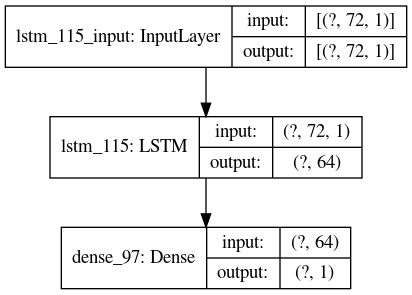

In [619]:

from keras.utils.vis_utils import plot_model

from keras.utils import plot_model
 
plot_model(model, show_shapes=True, show_layer_names=True)

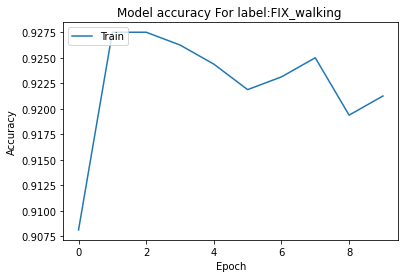

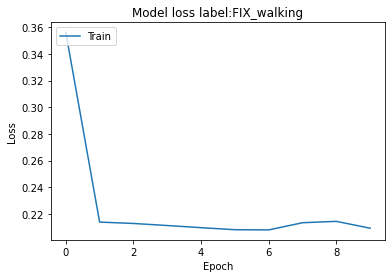

In [620]:


#history = model.fit(X_train, y_train, epochs=10, batch_size=32)
import numpy as np
import matplotlib.pyplot as plt

# plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Model accuracy For label:FIX_walking ')
# create the scatter plot with different colors for each label
# plot the curve with a specific color

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# plot training and validation loss
plt.plot(history.history['loss'])
plt.title('Model loss label:FIX_walking')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [621]:
#evaluate model on test data
# convert DataFrame to numpy array
X_test = X_test.values

X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)
# Measure computation cost on client-side
start = time.time()
model.predict(X_test[:100])
end = time.time()
print('Client-side computation cost:', end - start, 'seconds')


Test Accuracy: 0.933
Client-side computation cost: 0.4203987121582031 seconds


In [622]:
#make predictions on test data
y_pred = model.predict(X_test)
# Measure computation cost on server-side
start = time.time()
model.predict(X_test)
end = time.time()
print('Server-side computation cost:', end - start, 'seconds')


Server-side computation cost: 0.22277569770812988 seconds


In [623]:
#round probabilities to get binary predictions
y_pred = np.round(y_pred)

In [624]:
# Measure memory requirement on client-side
memory_requirement = model.count_params() * 4 # assuming 32-bit float
print('Client-side memory requirement:', memory_requirement, 'bytes')

Client-side memory requirement: 67844 bytes


Accuracy: This is a measure of how often the model correctly predicts the class of the test data. It is calculated by dividing the number of correct predictions by the total number of predictions.

Precision: This is a measure of how many of the predicted positive results are actually positive. It is calculated by dividing the number of true positives by the sum of true positives and false positives.

Recall: This is a measure of how many of the actual positive results are correctly predicted as positive by the model. It is calculated by dividing the number of true positives by the sum of true positives and false negatives.

F1 Score: This is a harmonic mean of precision and recall. It is calculated as 2 * (precision * recall) / (precision + recall).

In [625]:
#calculate accuracy, precision, recall, and F1 score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.933
Precision: 0.500
Recall: 0.022
F1 Score: 0.042


In [626]:
# Measure communication cost between client and server
communication_cost = X_test.nbytes + y_test.nbytes
print('Communication cost:', communication_cost, 'bytes')

Communication cost: 396399 bytes


In [627]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# For label:FIX_walking
# compute the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(y_test)
# print the evaluation metrics
print("MAE: {:.4f}".format(mae))
print("RMSE: {:.4f}".format(rmse))
print("R-squared: {:.4f}".format(r2))

1249    False
990      True
809     False
1043    False
736     False
        ...  
1053    False
1987    False
261     False
944     False
1366    False
Name: label:FIX_walking, Length: 687, dtype: bool
MAE: 0.0670
RMSE: 0.2588
R-squared: -0.0718


Now trying another label: 

let say

label:SLEEPING

Another label: let say : label:PHONE_ON_TABLE

In [628]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X[features_of_selected_sensors], Y['label:IN_CLASS'], test_size=0.30, random_state=42)

In [629]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import time
# Check the shape of X2_train
print(X2_train.shape)

import numpy as np


# check the number of dimensions in X_train
print(X2_train.ndim)  # output: 2

# convert DataFrame to numpy array
X2_train = X2_train.values

# reshape X_train to have shape (batch_size, sequence_length, num_channels, 1)
# but since X_train has only 2 dimensions, we should modify the reshaping code accordingly
X2_train = X2_train.reshape((X2_train.shape[0], X2_train.shape[1], 1))
print(X2_train.ndim)
# now check the shape of X_train again
 # output: (100, 10, 1)

print(X2_train.shape)

# define LSTM architecture
model2 = Sequential()
model2.add(LSTM(24, input_shape=(X2_train.shape[1], X2_train.shape[2])))

model2.add(Dense(1, activation='sigmoid'))

# compile model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train model
start = time.time()
history2=model2.fit(X2_train, y2_train, epochs=10, batch_size=42)
end = time.time()
print('Training time:', end - start, 'seconds')



(1600, 72)
2
3
(1600, 72, 1)
Epoch 1/10
39/39 [==============================] - 1s 26ms/step - loss: 0.5435 - accuracy: 0.8756
Epoch 2/10
39/39 [==============================] - 1s 25ms/step - loss: 0.3318 - accuracy: 0.9019
Epoch 3/10
39/39 [==============================] - 1s 24ms/step - loss: 0.3219 - accuracy: 0.9019
Epoch 4/10
39/39 [==============================] - 1s 24ms/step - loss: 0.3219 - accuracy: 0.9019
Epoch 5/10
39/39 [==============================] - 1s 24ms/step - loss: 0.3208 - accuracy: 0.9019
Epoch 6/10
39/39 [==============================] - 1s 24ms/step - loss: 0.3219 - accuracy: 0.9019
Epoch 7/10
39/39 [==============================] - 1s 24ms/step - loss: 0.3200 - accuracy: 0.9019
Epoch 8/10
39/39 [==============================] - 1s 24ms/step - loss: 0.3195 - accuracy: 0.9019
Epoch 9/10
39/39 [==============================] - 1s 25ms/step - loss: 0.3184 - accuracy: 0.9019
Epoch 10/10
39/39 [==============================] - 1s 24ms/step - loss: 0.3177

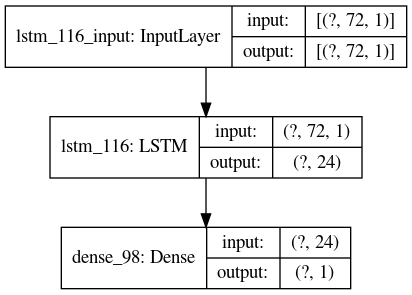

In [631]:

from keras.utils.vis_utils import plot_model

from keras.utils import plot_model
 
plot_model(model2, show_shapes=True, show_layer_names=True)

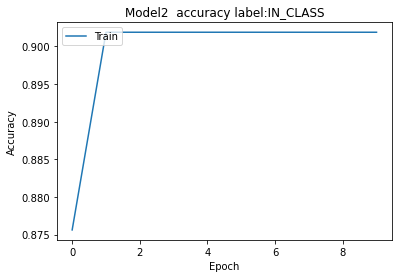

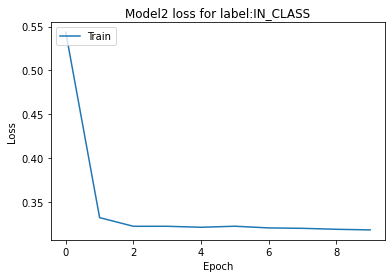

In [632]:
import matplotlib.pyplot as plt

#history = model.fit(X_train, y_train, epochs=10, batch_size=32)
import numpy as np
import matplotlib.pyplot as plt



# plot training accuracy
plt.plot(history2.history['accuracy'])
plt.title('Model2  accuracy label:IN_CLASS')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# plot training and validation loss
plt.plot(history2.history['loss'])
plt.title('Model2 loss for label:IN_CLASS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [633]:
#evaluate model on test data
# convert DataFrame to numpy array
X2_test = X2_test.values

X2_test = X2_test.reshape((X2_test.shape[0], X2_test.shape[1], 1))
loss, acc = model2.evaluate(X2_test, y2_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.917


In [634]:
#make predictions on test data
# Measure computation cost on client-side
start = time.time()
#model.predict(x_test[:100])
y2_pred = model2.predict(X2_test)
end = time.time()
print('Client-side computation cost:', end - start, 'seconds')



Client-side computation cost: 0.5209896564483643 seconds


In [635]:
#round probabilities to get binary predictions
y2_pred = np.round(y2_pred)

In [636]:
#calculate accuracy, precision, recall, and F1 score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: %.3f' % accuracy_score(y2_test, y2_pred))
print('Precision: %.3f' % precision_score(y2_test, y2_pred))
print('Recall: %.3f' % recall_score(y2_test, y2_pred))
print('F1 Score: %.3f' % f1_score(y2_test, y2_pred))

Accuracy: 0.917
Precision: 0.000
Recall: 0.000
F1 Score: 0.000


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [637]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#for label:IN_CLASS
# compute the evaluation metrics
mae = mean_absolute_error(y2_test, y2_pred)
rmse = mean_squared_error(y2_test, y2_pred, squared=False)
r2 = r2_score(y2_test, y2_pred)
print(y2_test)
# print the evaluation metrics
print("MAE: {:.4f}".format(mae))
print("RMSE: {:.4f}".format(rmse))
print("R-squared: {:.4f}".format(r2))

1249    False
990     False
809     False
1043    False
736      True
        ...  
1053    False
1987    False
261     False
944      True
1366    False
Name: label:IN_CLASS, Length: 687, dtype: bool
MAE: 0.0830
RMSE: 0.2880
R-squared: -0.0905
